In [1]:
import pandas as pd

#import the transport csv

#the is Data for the whole thing
transport = pd.read_csv('Data/wu03ew_msoa.csv')


bus_loc = pd.read_csv('Data/Bus_locations.csv')
train_loc = pd.read_csv('Data/Train locations.csv')
metro_loc = pd.read_csv('Data/Metro_locations.csv')

In [2]:
#merge by origin MSOA and sum over all transport options
transport_msoa = transport.groupby("Area of residence", as_index=False).sum()
transport_msoa

,Area of residence,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
0,E02000001,4785,701,880,260,265,43,22,135,11,243,2184,41
1,E02000002,2484,159,389,204,366,20,22,1076,87,33,116,12
2,E02000003,4539,313,580,901,482,22,31,1778,103,40,268,21
3,E02000004,2858,182,290,393,285,19,31,1322,92,38,193,13
4,E02000005,3595,226,446,442,542,19,33,1503,122,57,199,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,4719,381,1,61,160,49,34,3019,425,121,451,17
7197,W02000420,6725,897,10,56,240,13,32,4792,277,101,270,37
7198,W02000421,5589,1378,6,19,100,10,32,3431,310,55,224,24
7199,W02000422,4672,283,3,232,374,25,10,2531,153,158,881,22


In [3]:

bus_loc = bus_loc.rename(columns = {'Freq': 'Bus_stops'})
bus_loc

,Var1,Bus_stops
0,E02000001,168
1,E02000002,20
2,E02000003,18
3,E02000004,13
4,E02000005,10
...,...,...
7194,W02000419,68
7195,W02000420,107
7196,W02000421,130
7197,W02000422,52


In [4]:
train_loc = train_loc.rename(columns = {'Freq': 'Train_stations'})

In [5]:
metro_loc = metro_loc.rename(columns = {'Freq': 'metro_stations'})

In [6]:
transport_msoa1 = pd.merge(transport_msoa,
                          bus_loc,
                           left_on = "Area of residence",
                           right_on = "Var1",
                          how = 'left')

In [7]:
transport_msoa1.isna().sum()

Area of residence                           0
All categories: Method of travel to work    0
Work mainly at or from home                 0
Underground, metro, light rail, tram        0
Train                                       0
Bus, minibus or coach                       0
Taxi                                        0
Motorcycle, scooter or moped                0
Driving a car or van                        0
Passenger in a car or van                   0
Bicycle                                     0
On foot                                     0
Other method of travel to work              0
Var1                                        2
Bus_stops                                   2
dtype: int64

In [8]:
transport_msoa2 = pd.merge(transport_msoa1,
                          train_loc,
                          left_on = "Area of residence",
                          right_on = "Var1",
                          how = 'left')

In [9]:
transport_msoa3 = pd.merge(transport_msoa2,
                          metro_loc,
                          left_on = "Area of residence",
                          right_on = "Var1",
                          how = 'left')

In [10]:
transport_msoa3.isna().sum()

Area of residence                              0
All categories: Method of travel to work       0
Work mainly at or from home                    0
Underground, metro, light rail, tram           0
Train                                          0
Bus, minibus or coach                          0
Taxi                                           0
Motorcycle, scooter or moped                   0
Driving a car or van                           0
Passenger in a car or van                      0
Bicycle                                        0
On foot                                        0
Other method of travel to work                 0
Var1_x                                         2
Bus_stops                                      2
Var1_y                                      5390
Train_stations                              5390
Var1                                        6666
metro_stations                              6666
dtype: int64

In [11]:
#transport_msoa3.to_csv("Data/transport_msoa.csv", index=False)

In [12]:
transport_msoa3

,Area of residence,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,Var1_x,Bus_stops,Var1_y,Train_stations,Var1,metro_stations
0,E02000001,4785,701,880,260,265,43,22,135,11,243,2184,41,E02000001,168.0,E02000001,8.0,E02000001,12.0
1,E02000002,2484,159,389,204,366,20,22,1076,87,33,116,12,E02000002,20.0,NaN,NaN,NaN,NaN
2,E02000003,4539,313,580,901,482,22,31,1778,103,40,268,21,E02000003,18.0,NaN,NaN,NaN,NaN
3,E02000004,2858,182,290,393,285,19,31,1322,92,38,193,13,E02000004,13.0,NaN,NaN,NaN,NaN
4,E02000005,3595,226,446,442,542,19,33,1503,122,57,199,6,E02000005,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,4719,381,1,61,160,49,34,3019,425,121,451,17,W02000419,68.0,NaN,NaN,NaN,NaN
7197,W02000420,6725,897,10,56,240,13,32,4792,277,101,270,37,W02000420,107.0,NaN,NaN,NaN,NaN
7198,W02000421,5589,1378,6,19,100,10,32,3431,310,55,224,24,W02000421,130.0,NaN,NaN,W02000421,7.0
7199,W02000422,4672,283,3,232,374,25,10,2531,153,158,881,22,W02000422,52.0,NaN,NaN,NaN,NaN


In [13]:
households = pd.read_csv("Data/MSOA households.csv")
cars = pd.read_csv("Data/household cars.csv")

In [14]:
households

,Region code,Region name,Local authority code,Local authority name,MSOA Code,MSOA Name,Persons All usual residents,Persons Household residents,Persons Communal establishment residents,Hectares,Persons per hectare,Households with at least one usual resident,Average household size
0,E12000001,NORTH EAST,E06000047,County Durham UA,E02004297,County Durham 001,"7,900","7,825",75,"1,558",5.1,"3,550",2.2
1,E12000001,NORTH EAST,E06000047,County Durham UA,E02004290,County Durham 002,"5,981","5,981",0,884,6.8,"2,518",2.4
2,E12000001,NORTH EAST,E06000047,County Durham UA,E02004298,County Durham 003,"9,703","9,486",217,"1,878",5.2,"4,178",2.3
3,E12000001,NORTH EAST,E06000047,County Durham UA,E02004299,County Durham 004,"8,474","8,352",122,898,9.4,"3,758",2.2
4,E12000001,NORTH EAST,E06000047,County Durham UA,E02004291,County Durham 005,"6,787","6,702",85,787,8.6,"3,131",2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,NaN,NaN,W06000022,Newport,W02000362,Newport 016,"5,986","5,981",5,365,16.4,"2,605",2.3
7197,NaN,NaN,W06000022,Newport,W02000363,Newport 017,"5,657","5,580",77,220,25.7,"2,624",2.1
7198,NaN,NaN,W06000022,Newport,W02000364,Newport 018,"7,318","7,272",46,553,13.2,"2,957",2.5
7199,NaN,NaN,W06000022,Newport,W02000365,Newport 019,"7,485","7,485",0,239,31.3,"3,077",2.4


In [15]:
cars

,date,geography,geography code,Rural Urban,Cars: All categories: Car or van availability; measures: Value,Cars: No cars or vans in household; measures: Value,Cars: 1 car or van in household; measures: Value,Cars: 2 cars or vans in household; measures: Value,Cars: 3 cars or vans in household; measures: Value,Cars: 4 or more cars or vans in household; measures: Value,Cars: sum of All cars or vans in the area; measures: Value
0,2011,Darlington 001,E02002559,Total,3646,257,1424,1534,335,96,5932
1,2011,Darlington 002,E02002560,Total,2511,528,1160,662,129,32,3026
2,2011,Darlington 003,E02002561,Total,2507,471,1206,662,140,28,3070
3,2011,Darlington 004,E02002562,Total,2933,1239,1224,380,72,18,2279
4,2011,Darlington 005,E02002563,Total,2343,652,1109,464,100,18,2409
...,...,...,...,...,...,...,...,...,...,...,...
7196,2011,Newport 016,W02000362,Total,2605,425,1127,799,198,56,3561
7197,2011,Newport 017,W02000363,Total,2624,842,1131,514,109,28,2607
7198,2011,Newport 018,W02000364,Total,2957,1475,1117,301,54,10,1922
7199,2011,Newport 019,W02000365,Total,3077,1026,1345,595,91,20,2896


In [16]:
household_cars= pd.merge(households,
                          cars,
                           left_on = "MSOA Code",
                         right_on = "geography code",
                          how = 'left')

In [17]:
pd.set_option('display.max_columns', None)
household_cars

,Region code,Region name,Local authority code,Local authority name,MSOA Code,MSOA Name,Persons All usual residents,Persons Household residents,Persons Communal establishment residents,Hectares,Persons per hectare,Households with at least one usual resident,Average household size,date,geography,geography code,Rural Urban,Cars: All categories: Car or van availability; measures: Value,Cars: No cars or vans in household; measures: Value,Cars: 1 car or van in household; measures: Value,Cars: 2 cars or vans in household; measures: Value,Cars: 3 cars or vans in household; measures: Value,Cars: 4 or more cars or vans in household; measures: Value,Cars: sum of All cars or vans in the area; measures: Value
0,E12000001,NORTH EAST,E06000047,County Durham UA,E02004297,County Durham 001,"7,900","7,825",75,"1,558",5.1,"3,550",2.2,2011,County Durham 001,E02004297,Total,3550,701,1540,1040,203,66,4534
1,E12000001,NORTH EAST,E06000047,County Durham UA,E02004290,County Durham 002,"5,981","5,981",0,884,6.8,"2,518",2.4,2011,County Durham 002,E02004290,Total,2518,318,1080,885,176,59,3629
2,E12000001,NORTH EAST,E06000047,County Durham UA,E02004298,County Durham 003,"9,703","9,486",217,"1,878",5.2,"4,178",2.3,2011,County Durham 003,E02004298,Total,4178,690,1765,1338,289,96,5722
3,E12000001,NORTH EAST,E06000047,County Durham UA,E02004299,County Durham 004,"8,474","8,352",122,898,9.4,"3,758",2.2,2011,County Durham 004,E02004299,Total,3758,1022,1624,870,184,58,4164
4,E12000001,NORTH EAST,E06000047,County Durham UA,E02004291,County Durham 005,"6,787","6,702",85,787,8.6,"3,131",2.1,2011,County Durham 005,E02004291,Total,3131,932,1410,655,106,28,3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,NaN,NaN,W06000022,Newport,W02000362,Newport 016,"5,986","5,981",5,365,16.4,"2,605",2.3,2011,Newport 016,W02000362,Total,2605,425,1127,799,198,56,3561
7197,NaN,NaN,W06000022,Newport,W02000363,Newport 017,"5,657","5,580",77,220,25.7,"2,624",2.1,2011,Newport 017,W02000363,Total,2624,842,1131,514,109,28,2607
7198,NaN,NaN,W06000022,Newport,W02000364,Newport 018,"7,318","7,272",46,553,13.2,"2,957",2.5,2011,Newport 018,W02000364,Total,2957,1475,1117,301,54,10,1922
7199,NaN,NaN,W06000022,Newport,W02000365,Newport 019,"7,485","7,485",0,239,31.3,"3,077",2.4,2011,Newport 019,W02000365,Total,3077,1026,1345,595,91,20,2896


In [18]:
household_cars["HHs_owning cars"] = household_cars["Cars: All categories: Car or van availability; measures: Value"] - household_cars["Cars: No cars or vans in household; measures: Value"]

In [19]:
household_cars["HH_owning_cars_perc"] = household_cars["HHs_owning cars"] / household_cars["Cars: All categories: Car or van availability; measures: Value"]  

In [20]:
household_cars

,Region code,Region name,Local authority code,Local authority name,MSOA Code,MSOA Name,Persons All usual residents,Persons Household residents,Persons Communal establishment residents,Hectares,Persons per hectare,Households with at least one usual resident,Average household size,date,geography,geography code,Rural Urban,Cars: All categories: Car or van availability; measures: Value,Cars: No cars or vans in household; measures: Value,Cars: 1 car or van in household; measures: Value,Cars: 2 cars or vans in household; measures: Value,Cars: 3 cars or vans in household; measures: Value,Cars: 4 or more cars or vans in household; measures: Value,Cars: sum of All cars or vans in the area; measures: Value,HHs_owning cars,HH_owning_cars_perc
0,E12000001,NORTH EAST,E06000047,County Durham UA,E02004297,County Durham 001,"7,900","7,825",75,"1,558",5.1,"3,550",2.2,2011,County Durham 001,E02004297,Total,3550,701,1540,1040,203,66,4534,2849,0.802535
1,E12000001,NORTH EAST,E06000047,County Durham UA,E02004290,County Durham 002,"5,981","5,981",0,884,6.8,"2,518",2.4,2011,County Durham 002,E02004290,Total,2518,318,1080,885,176,59,3629,2200,0.873709
2,E12000001,NORTH EAST,E06000047,County Durham UA,E02004298,County Durham 003,"9,703","9,486",217,"1,878",5.2,"4,178",2.3,2011,County Durham 003,E02004298,Total,4178,690,1765,1338,289,96,5722,3488,0.834849
3,E12000001,NORTH EAST,E06000047,County Durham UA,E02004299,County Durham 004,"8,474","8,352",122,898,9.4,"3,758",2.2,2011,County Durham 004,E02004299,Total,3758,1022,1624,870,184,58,4164,2736,0.728047
4,E12000001,NORTH EAST,E06000047,County Durham UA,E02004291,County Durham 005,"6,787","6,702",85,787,8.6,"3,131",2.1,2011,County Durham 005,E02004291,Total,3131,932,1410,655,106,28,3160,2199,0.702332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,NaN,NaN,W06000022,Newport,W02000362,Newport 016,"5,986","5,981",5,365,16.4,"2,605",2.3,2011,Newport 016,W02000362,Total,2605,425,1127,799,198,56,3561,2180,0.836852
7197,NaN,NaN,W06000022,Newport,W02000363,Newport 017,"5,657","5,580",77,220,25.7,"2,624",2.1,2011,Newport 017,W02000363,Total,2624,842,1131,514,109,28,2607,1782,0.679116
7198,NaN,NaN,W06000022,Newport,W02000364,Newport 018,"7,318","7,272",46,553,13.2,"2,957",2.5,2011,Newport 018,W02000364,Total,2957,1475,1117,301,54,10,1922,1482,0.501184
7199,NaN,NaN,W06000022,Newport,W02000365,Newport 019,"7,485","7,485",0,239,31.3,"3,077",2.4,2011,Newport 019,W02000365,Total,3077,1026,1345,595,91,20,2896,2051,0.666558


In [21]:
#merging on household cars owned
transport_msoa4 = pd.merge(transport_msoa3,
                          household_cars[["HH_owning_cars_perc", "MSOA Code"]],
                          left_on = "Area of residence",
                          right_on = "MSOA Code",
                          how = 'left')

In [22]:
#filling all NaNs with 0
transport_msoa4.fillna(0)

,Area of residence,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,Var1_x,Bus_stops,Var1_y,Train_stations,Var1,metro_stations,HH_owning_cars_perc,MSOA Code
0,E02000001,4785,701,880,260,265,43,22,135,11,243,2184,41,E02000001,168.0,E02000001,8.0,E02000001,12.0,0.306043,E02000001
1,E02000002,2484,159,389,204,366,20,22,1076,87,33,116,12,E02000002,20.0,0,0.0,0,0.0,0.624032,E02000002
2,E02000003,4539,313,580,901,482,22,31,1778,103,40,268,21,E02000003,18.0,0,0.0,0,0.0,0.688054,E02000003
3,E02000004,2858,182,290,393,285,19,31,1322,92,38,193,13,E02000004,13.0,0,0.0,0,0.0,0.760138,E02000004
4,E02000005,3595,226,446,442,542,19,33,1503,122,57,199,6,E02000005,10.0,0,0.0,0,0.0,0.660697,E02000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,4719,381,1,61,160,49,34,3019,425,121,451,17,W02000419,68.0,0,0.0,0,0.0,0.785945,W02000419
7197,W02000420,6725,897,10,56,240,13,32,4792,277,101,270,37,W02000420,107.0,0,0.0,0,0.0,0.897257,W02000420
7198,W02000421,5589,1378,6,19,100,10,32,3431,310,55,224,24,W02000421,130.0,0,0.0,W02000421,7.0,0.892381,W02000421
7199,W02000422,4672,283,3,232,374,25,10,2531,153,158,881,22,W02000422,52.0,0,0.0,0,0.0,0.824302,W02000422


In [23]:
#writing to the csv
#transport_msoa4.to_csv("Data/transport_msoa2.csv", index=False)

In [24]:
#reading in the csv written to before
transport = pd.read_csv("Data/transport_msoa2.csv")

In [25]:
#changing all modes of transport to percentages
transport["work_from_home_perc"] = transport["Work mainly at or from home"] / transport["All categories: Method of travel to work"] *100
transport["underground_metro_perc"] = transport["Underground, metro, light rail, tram"] / transport["All categories: Method of travel to work"] *100
transport["train_perc"] = transport["Train"] / transport["All categories: Method of travel to work"] *100
transport["bus_perc"] = transport["Bus, minibus or coach"] / transport["All categories: Method of travel to work"] *100
transport["taxi_perc"] = transport["Taxi"] / transport["All categories: Method of travel to work"] *100
transport["motorcycle_perc"] = transport["Motorcycle, scooter or moped"] / transport["All categories: Method of travel to work"] *100
transport["car_or_van_drive_perc"] = transport["Driving a car or van"] / transport["All categories: Method of travel to work"] *100
transport["car_or_van_passenger_perc"] = transport["Passenger in a car or van"] / transport["All categories: Method of travel to work"] *100
transport["bicycle_perc"] = transport["Bicycle"] / transport["All categories: Method of travel to work"] *100
transport["on_foot_perc"] = transport["On foot"] / transport["All categories: Method of travel to work"] *100
transport["other_perc"] = transport["Other method of travel to work"] / transport["All categories: Method of travel to work"] *100

In [26]:
#checking that the transport percentage has worked
transport

,Area of residence,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,Var1_x,Bus_stops,Var1_y,Train_stations,Var1,metro_stations,HH_owning_cars_perc,MSOA Code,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,motorcycle_perc,car_or_van_drive_perc,car_or_van_passenger_perc,bicycle_perc,on_foot_perc,other_perc
0,E02000001,4785,701,880,260,265,43,22,135,11,243,2184,41,E02000001,168.0,E02000001,8.0,E02000001,12.0,0.306043,E02000001,14.649948,18.390805,5.433647,5.538140,0.898642,0.459770,2.821317,0.229885,5.078370,45.642633,0.856844
1,E02000002,2484,159,389,204,366,20,22,1076,87,33,116,12,E02000002,20.0,NaN,NaN,NaN,NaN,0.624032,E02000002,6.400966,15.660225,8.212560,14.734300,0.805153,0.885668,43.317230,3.502415,1.328502,4.669887,0.483092
2,E02000003,4539,313,580,901,482,22,31,1778,103,40,268,21,E02000003,18.0,NaN,NaN,NaN,NaN,0.688054,E02000003,6.895792,12.778145,19.850187,10.619079,0.484688,0.682970,39.171624,2.269222,0.881251,5.904384,0.462657
3,E02000004,2858,182,290,393,285,19,31,1322,92,38,193,13,E02000004,13.0,NaN,NaN,NaN,NaN,0.760138,E02000004,6.368090,10.146956,13.750875,9.972008,0.664801,1.084675,46.256123,3.219034,1.329601,6.752974,0.454864
4,E02000005,3595,226,446,442,542,19,33,1503,122,57,199,6,E02000005,10.0,NaN,NaN,NaN,NaN,0.660697,E02000005,6.286509,12.406120,12.294854,15.076495,0.528512,0.917942,41.808067,3.393602,1.585535,5.535466,0.166898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,4719,381,1,61,160,49,34,3019,425,121,451,17,W02000419,68.0,NaN,NaN,NaN,NaN,0.785945,W02000419,8.073744,0.021191,1.292647,3.390549,1.038356,0.720492,63.975419,9.006145,2.564103,9.557110,0.360246
7197,W02000420,6725,897,10,56,240,13,32,4792,277,101,270,37,W02000420,107.0,NaN,NaN,NaN,NaN,0.897257,W02000420,13.338290,0.148699,0.832714,3.568773,0.193309,0.475836,71.256506,4.118959,1.501859,4.014870,0.550186
7198,W02000421,5589,1378,6,19,100,10,32,3431,310,55,224,24,W02000421,130.0,NaN,NaN,W02000421,7.0,0.892381,W02000421,24.655573,0.107354,0.339953,1.789229,0.178923,0.572553,61.388442,5.546609,0.984076,4.007873,0.429415
7199,W02000422,4672,283,3,232,374,25,10,2531,153,158,881,22,W02000422,52.0,NaN,NaN,NaN,NaN,0.824302,W02000422,6.057363,0.064212,4.965753,8.005137,0.535103,0.214041,54.173801,3.274829,3.381849,18.857021,0.470890


In [27]:
#reading in the travel times
travel_car = pd.read_csv("Data/travel_time_car.csv")
travel_bus = pd.read_csv("Data/travel_time_bus.csv")
travel_rail = pd.read_csv("Data/travel_time_rail.csv")

In [28]:

#merging transport with travel by car time
transport = pd.merge(transport,
                    travel_car,
                    left_on = "Area of residence",
                    right_on = "origin_msoacode",
                    how = 'left')

In [29]:
#merging with travel by bus times
transport = pd.merge(transport,
                    travel_bus,
                    left_on = "Area of residence",
                    right_on = "origin_msoacode",
                    how = 'left')

In [30]:
#merging with travel by rail times
transport = pd.merge(transport,
                    travel_rail,
                    left_on = "Area of residence",
                    right_on = "origin_msoacode",
                    how = 'left')

In [31]:
transport.to_csv("Data/transport_msoa3.csv", index=False)

In [32]:
transport

,Area of residence,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram_x",Train,"Bus, minibus or coach_x",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,Var1_x,Bus_stops,Var1_y,Train_stations,Var1,metro_stations,HH_owning_cars_perc,MSOA Code,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,motorcycle_perc,car_or_van_drive_perc,car_or_van_passenger_perc,bicycle_perc,on_foot_perc,other_perc,origin_msoacode_x,avg_time_from_origin_car_UNWEIGHTED,car,cumulative_time_car,avg_time_car,origin_msoacode_y,avg_time_from_origin_bus_UNWEIGHTED,"Bus, minibus or coach_y",cumulative_time_bus,avg_time_bus,origin_msoacode,avg_time_from_origin_rail_UNWEIGHTED,"Underground, metro, light rail, tram_y",cumulative_time_rail,avg_time_rail
0,E02000001,4785,701,880,260,265,43,22,135,11,243,2184,41,E02000001,168.0,E02000001,8.0,E02000001,12.0,0.306043,E02000001,14.649948,18.390805,5.433647,5.538140,0.898642,0.459770,2.821317,0.229885,5.078370,45.642633,0.856844,E02000001,107.138221,113.0,1970.515125,17.438187,E02000001,230.859581,252.0,4731.529671,18.775911,E02000001,106.993596,796.0,10536.165719,13.236389
1,E02000002,2484,159,389,204,366,20,22,1076,87,33,116,12,E02000002,20.0,NaN,NaN,NaN,NaN,0.624032,E02000002,6.400966,15.660225,8.212560,14.734300,0.805153,0.885668,43.317230,3.502415,1.328502,4.669887,0.483092,E02000002,113.749868,982.0,9947.762828,10.130105,E02000002,274.805137,330.0,9989.492729,30.271190,E02000002,123.991276,321.0,8910.798812,27.759498
2,E02000003,4539,313,580,901,482,22,31,1778,103,40,268,21,E02000003,18.0,NaN,NaN,NaN,NaN,0.688054,E02000003,6.895792,12.778145,19.850187,10.619079,0.484688,0.682970,39.171624,2.269222,0.881251,5.904384,0.462657,E02000003,113.586928,1616.0,15323.978925,9.482660,E02000003,274.225431,442.0,13493.194688,30.527590,E02000003,122.518744,494.0,13681.823887,27.696000
3,E02000004,2858,182,290,393,285,19,31,1322,92,38,193,13,E02000004,13.0,NaN,NaN,NaN,NaN,0.760138,E02000004,6.368090,10.146956,13.750875,9.972008,0.664801,1.084675,46.256123,3.219034,1.329601,6.752974,0.454864,E02000004,116.934828,1221.0,12102.639555,9.912072,E02000004,277.881534,278.0,7004.190858,25.194931,E02000004,124.616367,244.0,6169.729638,25.285777
4,E02000005,3595,226,446,442,542,19,33,1503,122,57,199,6,E02000005,10.0,NaN,NaN,NaN,NaN,0.660697,E02000005,6.286509,12.406120,12.294854,15.076495,0.528512,0.917942,41.808067,3.393602,1.585535,5.535466,0.166898,E02000005,114.024047,1383.0,12484.379844,9.027028,E02000005,274.648700,500.0,14035.449835,28.070900,E02000005,122.390085,364.0,9579.924252,26.318473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,4719,381,1,61,160,49,34,3019,425,121,451,17,W02000419,68.0,NaN,NaN,NaN,NaN,0.785945,W02000419,8.073744,0.021191,1.292647,3.390549,1.038356,0.720492,63.975419,9.006145,2.564103,9.557110,0.360246,W02000419,154.988475,3125.0,33063.140118,10.580205,W02000419,378.175582,153.0,2963.981591,19.372429,W02000419,184.373645,1.0,186.314590,186.314590
7197,W02000420,6725,897,10,56,240,13,32,4792,277,101,270,37,W02000420,107.0,NaN,NaN,NaN,NaN,0.897257,W02000420,13.338290,0.148699,0.832714,3.568773,0.193309,0.475836,71.256506,4.118959,1.501859,4.014870,0.550186,W02000420,131.157535,4655.0,69324.438859,14.892468,W02000420,321.595111,238.0,5810.227354,24.412720,W02000420,172.831765,7.0,925.495322,132.213617
7198,W02000421,5589,1378,6,19,100,10,32,3431,310,55,224,24,W02000421,130.0,NaN,NaN,W02000421,7.0,0.892381,W02000421,24.655573,0.107354,0.339953,1.789229,0.178923,0.572553,61.388442,5.546609,0.984076,4.007873,0.429415,W02000421,183.039419,3276.0,68592.942606,20.938017,W02000421,366.770748,96.0,3756.583521,39.131078,W02000421,281.459917,2.0,441.514720,220.757360
7199,W02000422,4672,283,3,232,374,25,1

In [33]:
#transport.isna().sum()

In [34]:
# Create a new clean dataframe

# Remove all flow census counts
transport_final = transport.drop(transport.columns[1:13], axis=1)

# remove other columns by name
transport_final.drop(['Var1_x', 'Var1_y', 'Var1', 'MSOA Code', 'origin_msoacode_x', 'car', 'cumulative_time_car',
                     'origin_msoacode_y', 'Bus, minibus or coach_y', 'cumulative_time_bus', 'origin_msoacode',
                     'Underground, metro, light rail, tram_y', 'cumulative_time_rail'], axis=1, inplace=True)
transport_final

,Area of residence,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,motorcycle_perc,car_or_van_drive_perc,car_or_van_passenger_perc,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail
0,E02000001,168.0,8.0,12.0,0.306043,14.649948,18.390805,5.433647,5.538140,0.898642,0.459770,2.821317,0.229885,5.078370,45.642633,0.856844,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389
1,E02000002,20.0,NaN,NaN,0.624032,6.400966,15.660225,8.212560,14.734300,0.805153,0.885668,43.317230,3.502415,1.328502,4.669887,0.483092,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498
2,E02000003,18.0,NaN,NaN,0.688054,6.895792,12.778145,19.850187,10.619079,0.484688,0.682970,39.171624,2.269222,0.881251,5.904384,0.462657,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000
3,E02000004,13.0,NaN,NaN,0.760138,6.368090,10.146956,13.750875,9.972008,0.664801,1.084675,46.256123,3.219034,1.329601,6.752974,0.454864,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777
4,E02000005,10.0,NaN,NaN,0.660697,6.286509,12.406120,12.294854,15.076495,0.528512,0.917942,41.808067,3.393602,1.585535,5.535466,0.166898,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,68.0,NaN,NaN,0.785945,8.073744,0.021191,1.292647,3.390549,1.038356,0.720492,63.975419,9.006145,2.564103,9.557110,0.360246,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590
7197,W02000420,107.0,NaN,NaN,0.897257,13.338290,0.148699,0.832714,3.568773,0.193309,0.475836,71.256506,4.118959,1.501859,4.014870,0.550186,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617
7198,W02000421,130.0,NaN,7.0,0.892381,24.655573,0.107354,0.339953,1.789229,0.178923,0.572553,61.388442,5.546609,0.984076,4.007873,0.429415,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360
7199,W02000422,52.0,NaN,NaN,0.824302,6.057363,0.064212,4.965753,8.005137,0.535103,0.214041,54.173801,3.274829,3.381849,18.857021,0.470890,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943


In [35]:
# merge car owners with car passengers
transport_final['car_perc'] = transport_final['car_or_van_drive_perc'] + transport_final['car_or_van_passenger_perc']
# remove the old columns
transport_final.drop(['car_or_van_drive_perc', 'car_or_van_passenger_perc'], axis=1, inplace=True)

In [36]:
# change car ownership to % (just need to multiply by 100)
transport_final['HH_owning_cars_perc'] = transport_final['HH_owning_cars_perc'] * 100
transport_final

,Area of residence,Bus_stops,Train_stations,metro_stations,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,taxi_perc,motorcycle_perc,bicycle_perc,on_foot_perc,other_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,E02000001,168.0,8.0,12.0,30.604333,14.649948,18.390805,5.433647,5.538140,0.898642,0.459770,5.078370,45.642633,0.856844,107.138221,17.438187,230.859581,18.775911,106.993596,13.236389,3.051202
1,E02000002,20.0,NaN,NaN,62.403244,6.400966,15.660225,8.212560,14.734300,0.805153,0.885668,1.328502,4.669887,0.483092,113.749868,10.130105,274.805137,30.271190,123.991276,27.759498,46.819646
2,E02000003,18.0,NaN,NaN,68.805425,6.895792,12.778145,19.850187,10.619079,0.484688,0.682970,0.881251,5.904384,0.462657,113.586928,9.482660,274.225431,30.527590,122.518744,27.696000,41.440846
3,E02000004,13.0,NaN,NaN,76.013805,6.368090,10.146956,13.750875,9.972008,0.664801,1.084675,1.329601,6.752974,0.454864,116.934828,9.912072,277.881534,25.194931,124.616367,25.285777,49.475157
4,E02000005,10.0,NaN,NaN,66.069746,6.286509,12.406120,12.294854,15.076495,0.528512,0.917942,1.585535,5.535466,0.166898,114.024047,9.027028,274.648700,28.070900,122.390085,26.318473,45.201669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,68.0,NaN,NaN,78.594455,8.073744,0.021191,1.292647,3.390549,1.038356,0.720492,2.564103,9.557110,0.360246,154.988475,10.580205,378.175582,19.372429,184.373645,186.314590,72.981564
7197,W02000420,107.0,NaN,NaN,89.725659,13.338290,0.148699,0.832714,3.568773,0.193309,0.475836,1.501859,4.014870,0.550186,131.157535,14.892468,321.595111,24.412720,172.831765,132.213617,75.375465
7198,W02000421,130.0,NaN,7.0,89.238114,24.655573,0.107354,0.339953,1.789229,0.178923,0.572553,0.984076,4.007873,0.429415,183.039419,20.938017,366.770748,39.131078,281.459917,220.757360,66.935051
7199,W02000422,52.0,NaN,NaN,82.430213,6.057363,0.064212,4.965753,8.005137,0.535103,0.214041,3.381849,18.857021,0.470890,146.519709,13.193340,319.994342,18.133359,191.265110,158.132943,57.448630


In [37]:
# rename first column
transport_final.rename({'Area of residence': 'MSOA'}, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x1080 with 0 Axes>

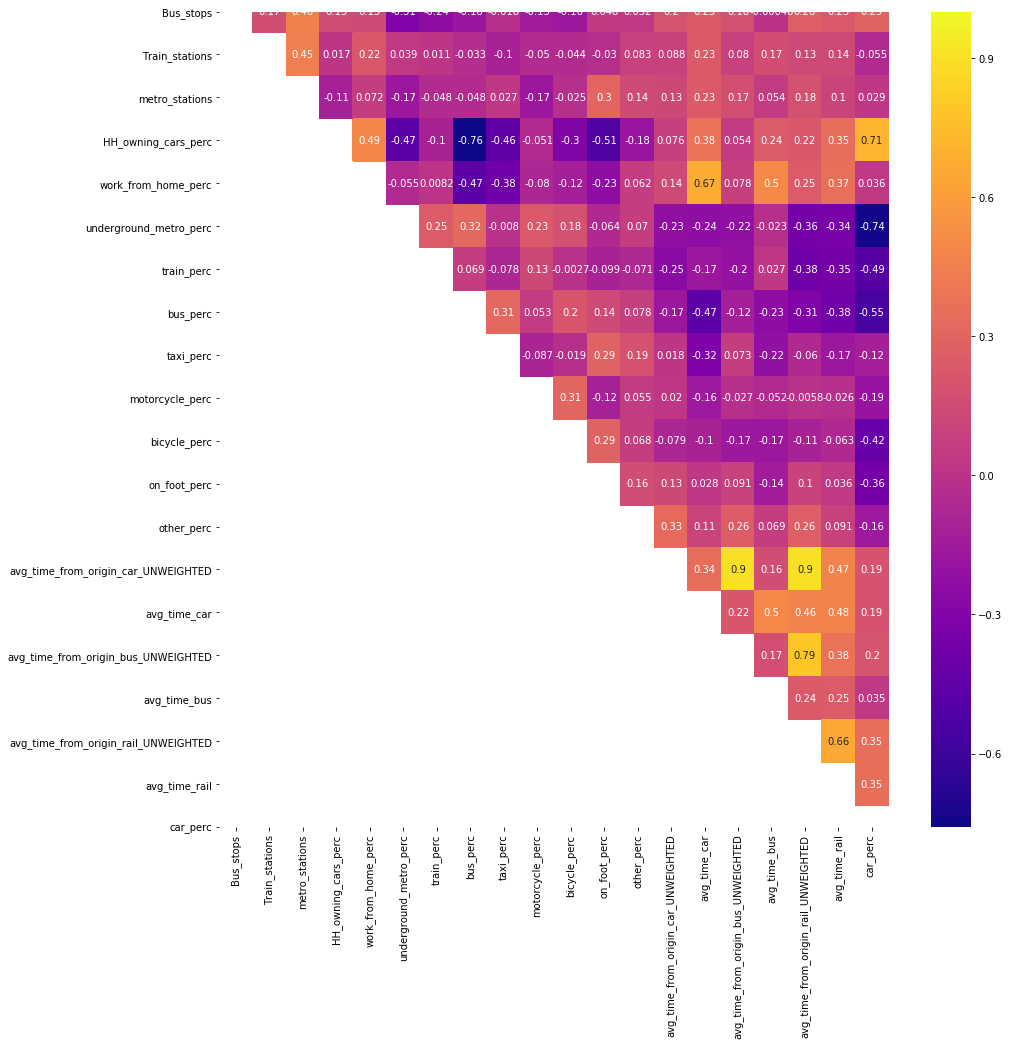

<Figure size 720x1080 with 0 Axes>

In [38]:
# correlation matrix 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# this one ensures graphs properly display in the notebook
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

mask = np.tril(transport_final.corr())

corrMatrix = transport_final.corr()
sns.heatmap(corrMatrix, annot=True, cmap = "plasma", mask = mask, ax = ax)
plt.figure(figsize=(10,15))
#plt.show()

## Remove some variables

In [39]:
transport_final = transport_final[['MSOA','work_from_home_perc', 'underground_metro_perc', 'train_perc',
                                   'bus_perc', 'motorcycle_perc', 'bicycle_perc',
                                   'on_foot_perc', 'other_perc', 'car_perc']]
transport_final

,MSOA,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,motorcycle_perc,bicycle_perc,on_foot_perc,other_perc,car_perc
0,E02000001,14.649948,18.390805,5.433647,5.538140,0.459770,5.078370,45.642633,0.856844,3.051202
1,E02000002,6.400966,15.660225,8.212560,14.734300,0.885668,1.328502,4.669887,0.483092,46.819646
2,E02000003,6.895792,12.778145,19.850187,10.619079,0.682970,0.881251,5.904384,0.462657,41.440846
3,E02000004,6.368090,10.146956,13.750875,9.972008,1.084675,1.329601,6.752974,0.454864,49.475157
4,E02000005,6.286509,12.406120,12.294854,15.076495,0.917942,1.585535,5.535466,0.166898,45.201669
...,...,...,...,...,...,...,...,...,...,...
7196,W02000419,8.073744,0.021191,1.292647,3.390549,0.720492,2.564103,9.557110,0.360246,72.981564
7197,W02000420,13.338290,0.148699,0.832714,3.568773,0.475836,1.501859,4.014870,0.550186,75.375465
7198,W02000421,24.655573,0.107354,0.339953,1.789229,0.572553,0.984076,4.007873,0.429415,66.935051
7199,W02000422,6.057363,0.064212,4.965753,8.005137,0.214041,3.381849,18.857021,0.470890,57.448630


In [40]:
# save as csv
transport_final.to_csv("Data/cleaned_transport.csv", index=False)